# Profit & ROC Graph

## Imports

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Datengrundlage

In [2]:
data = pd.read_csv(os.path.join("..", "..", "..", "..", "data", "wine.csv"))
data.loc[data["Target"] == 3] = 2 # binarsieren
data["Target"] = data["Target"] - 1 # target auf 0 / 1 bringen
x_train, x_test, y_train, y_test = train_test_split(data.drop(["Target"],axis=1),data["Target"])

## Model Training

In [3]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [4]:
profit_tp = 0.2
profit_tn = 0.1
profit_fp = -1
profit_fn = -0.3

## Profit Graph

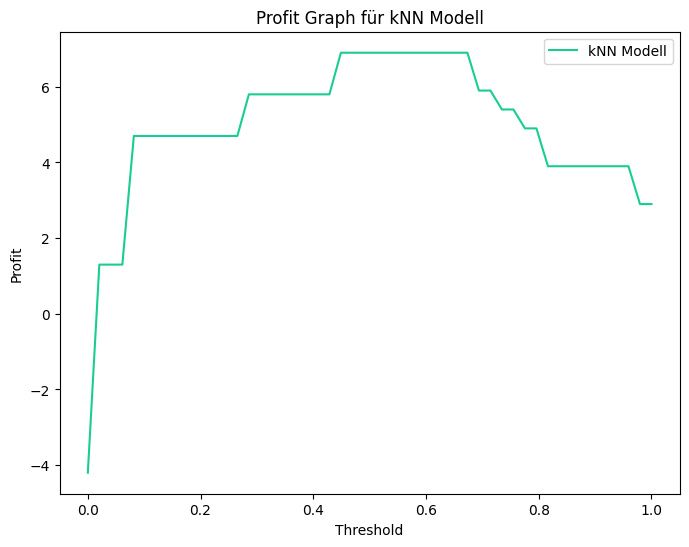

In [ ]:
profits = []
for i in np.linspace(0,1):
    probas = model.predict_proba(x_test)[:,1:]
    predictions = np.where(probas >= i,1,0)

    errors = predictions-y_test.to_numpy().reshape(-1,1)
    fp = np.count_nonzero(errors == 1)
    fn = np.count_nonzero(errors == -1)
    tp = np.sum(np.where(np.logical_and(errors == 0, predictions == 1),1,0))
    tn = np.sum(np.where(np.logical_and(errors == 0, predictions == 0),1,0))
    profits.append(fp*profit_fp+fn*profit_fn+tp*profit_tp+tn*profit_tn)

plt.figure(figsize=(8,6))
plt.title("Profit Graph für kNN Modell")
plt.plot(np.linspace(0,1), profits,label="kNN Modell",c="#1ACC94")
plt.xlabel("Threshold")
plt.ylabel("Profit")
plt.legend()
plt.show()